In [ ]:
! pip install yfinance

[*********************100%%**********************]  1 of 1 completed


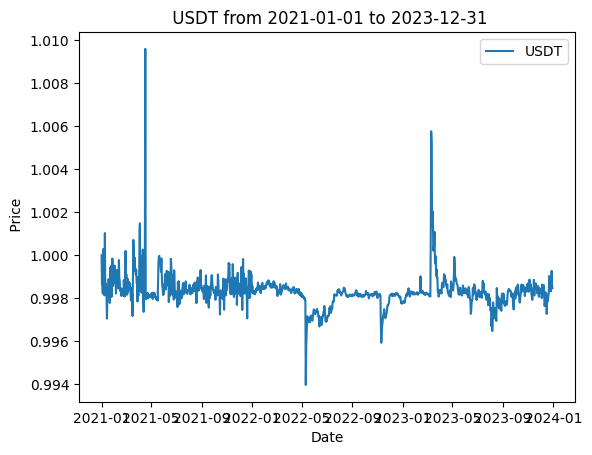

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for USDT
usdt_data = yf.download('USDT-USD', start='2021-01-01', end='2023-12-31')

# Normalize the prices by dividing by the first value
usdt_normalized = usdt_data['Close'] / usdt_data['Close'].iloc[0]

# Plot the normalized prices
plt.plot(usdt_normalized, label='USDT')
plt.xlabel('Date')
plt.ylabel(' Price')
plt.title(' USDT from 2021-01-01 to 2023-12-31')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


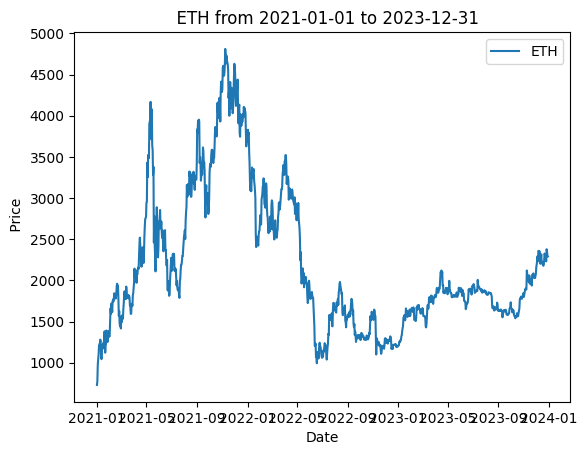

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for ETH
eth_data = yf.download('ETH-USD', start='2021-01-01', end='2023-12-31')

# Normalize the prices by dividing by the first value
eth_normalized = eth_data['Close']

# Plot the normalized prices
plt.plot(eth_normalized, label='ETH')
plt.xlabel('Date')
plt.ylabel(' Price')
plt.title('  ETH from 2021-01-01 to 2023-12-31')
plt.legend()
plt.show()

In [ ]:
import yfinance as yf

# Define the symbols for ETH and USDT
symbols = ['ETH-USD', 'USDT-USD']

# Fetch historical data
data = yf.download(symbols, start='2021-01-01', end='2023-12-31')

# Access and print the fetched data for each cryptocurrency
eth_data = data.xs('ETH-USD', axis=1, level=1)
usdt_data = data.xs('USDT-USD', axis=1, level=1)

# Print the specified columns for Ethereum (ETH)
print("Ethereum (ETH) Data:")
print(eth_data[['High', 'Low', 'Open', 'Close', 'Volume']])

# Print the specified columns for Tether (USDT)
print("\nTether (USDT) Data:")
print(usdt_data[['High', 'Low', 'Open', 'Close', 'Volume']])


[*********************100%%**********************]  2 of 2 completed

Ethereum (ETH) Data:
Price              High          Low         Open        Close       Volume
Date                                                                       
2021-01-01   749.201843   719.792236   737.708374   730.367554  13652004358
2021-01-02   786.798462   718.109497   730.402649   774.534973  19740771179
2021-01-03  1006.565002   771.561646   774.511841   975.507690  45200463368
2021-01-04  1153.189209   912.305359   977.058838  1040.233032  56945985763
2021-01-05  1129.371460   986.811279  1041.498779  1100.006104  41535932781
...                 ...          ...          ...          ...          ...
2023-12-26  2274.557373  2180.225342  2272.218750  2231.465332  10668581464
2023-12-27  2392.608643  2215.140381  2231.393066  2378.739990  14161342927
2023-12-28  2445.017578  2338.703857  2380.200684  2347.566162  15660799060
2023-12-29  2386.004639  2262.975830  2346.843750  2300.690674  12536968996
2023-12-30  2322.021484  2270.011963  2300.399658  2292.065430   68

In [ ]:
import yfinance as yf
from statsmodels.tsa.stattools import coint

# Define the symbols for ETH and USDT
symbols = ['ETH-USD', 'USDT-USD']

# Fetch historical data
data = yf.download(symbols, start='2021-01-01', end='2023-12-31')

# Access the Close prices for both pairs
eth_close = data['Close']['ETH-USD']
usdt_close = data['Close']['USDT-USD']

# Calculate the p-value for cointegration
_, p_value, _ = coint(eth_close, usdt_close)

# Print the p-value
print("P-value for cointegration between ETH/USD and USDT/USD:", p_value)


[*********************100%%**********************]  2 of 2 completed

P-value for cointegration between ETH/USD and USDT/USD: 0.0318147679312499


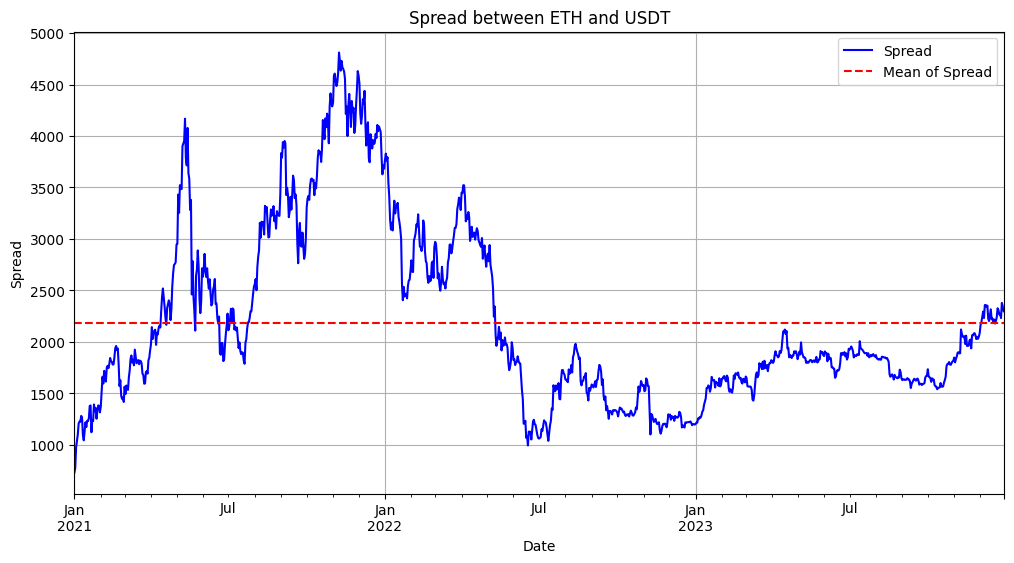

In [ ]:
import matplotlib.pyplot as plt

# Calculate the spread between the closing prices
spread = eth_close - usdt_close

# Calculate the mean of the spread
spread_mean = spread.mean()

# Plot the spread and its mean
plt.figure(figsize=(12, 6))
spread.plot(color='blue', label='Spread')
plt.axhline(y=spread_mean, color='red', linestyle='--', label='Mean of Spread')
plt.title('Spread between ETH and USDT')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.show()



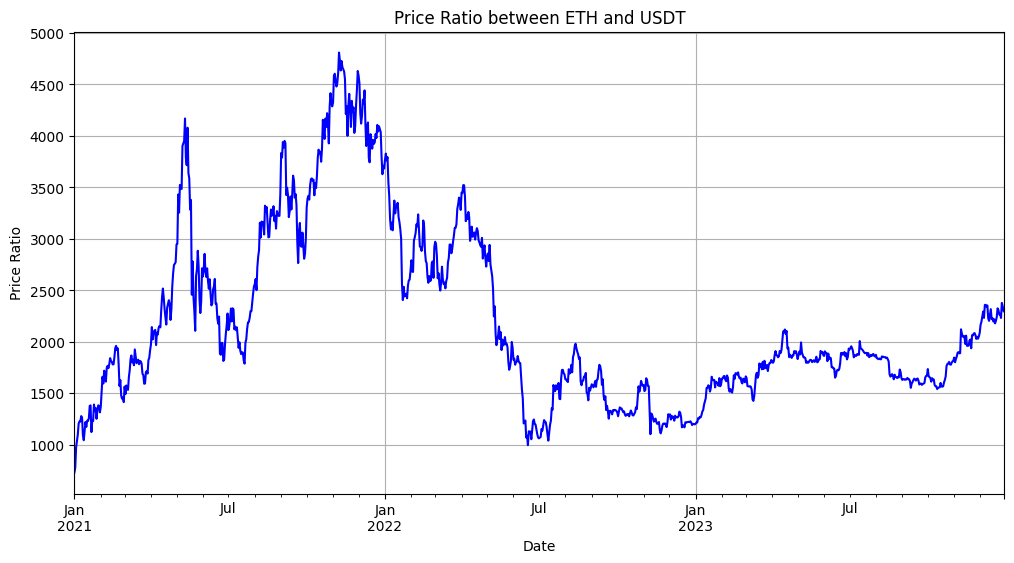

In [ ]:
# Calculate the price ratio between ETH and USDT
price_ratio = eth_close / usdt_close

# Plot the price ratio
plt.figure(figsize=(12, 6))
price_ratio.plot(color='blue')
plt.title('Price Ratio between ETH and USDT')
plt.xlabel('Date')
plt.ylabel('Price Ratio')
plt.grid(True)
plt.show()


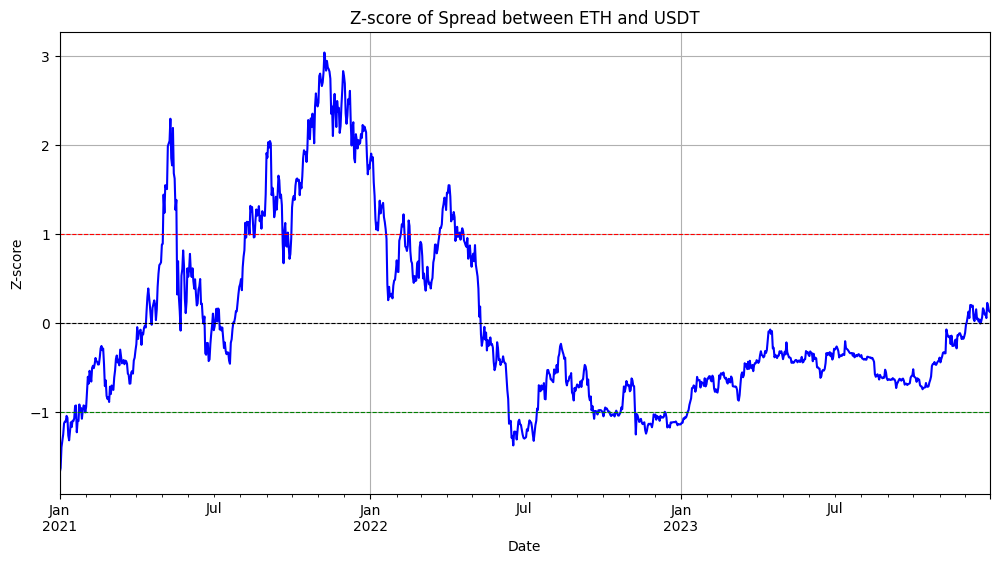

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Calculate the spread between the closing prices
spread = eth_close - usdt_close

# Calculate the mean and standard deviation of the spread
spread_mean = spread.mean()
spread_std = spread.std()

# Calculate the Z-score of the spread
z_score = (spread - spread_mean) / spread_std

# Plot the Z-score
plt.figure(figsize=(12, 6))
z_score.plot(color='blue')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.axhline(y=1, color='red', linestyle='--', linewidth=0.8)
plt.axhline(y=-1, color='green', linestyle='--', linewidth=0.8)
plt.title('Z-score of Spread between ETH and USDT')
plt.xlabel('Date')
plt.ylabel('Z-score')
plt.grid(True)
plt.show()


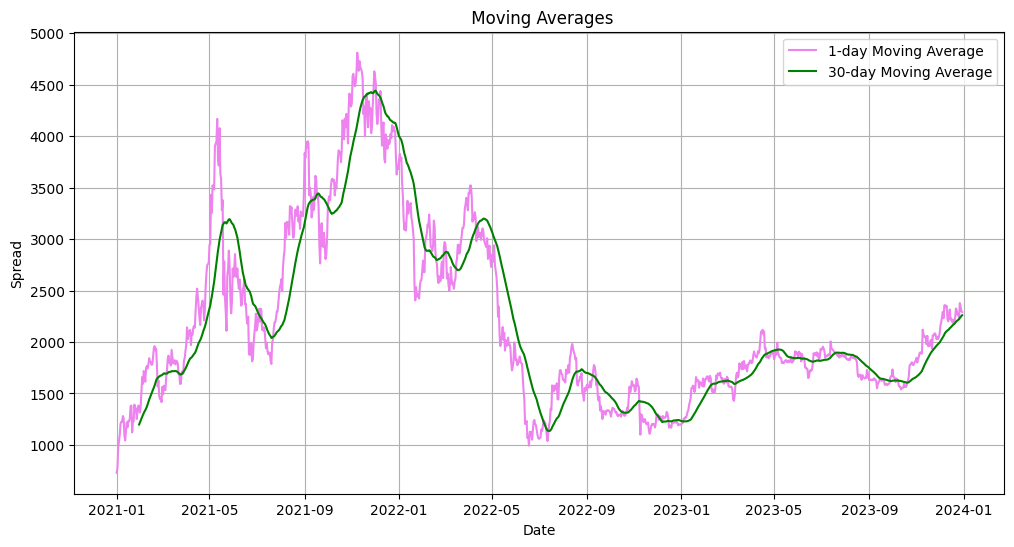

In [ ]:
# Calculate the 1-day and 30-day moving averages
ma_1d = spread.rolling(window=1).mean()
ma_30d = spread.rolling(window=30).mean()

# Plot the spread and moving averages
plt.figure(figsize=(12, 6))
plt.plot(ma_1d, label='1-day Moving Average', color='violet')
plt.plot(ma_30d, label='30-day Moving Average', color='green')
plt.title(' Moving Averages')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.show()


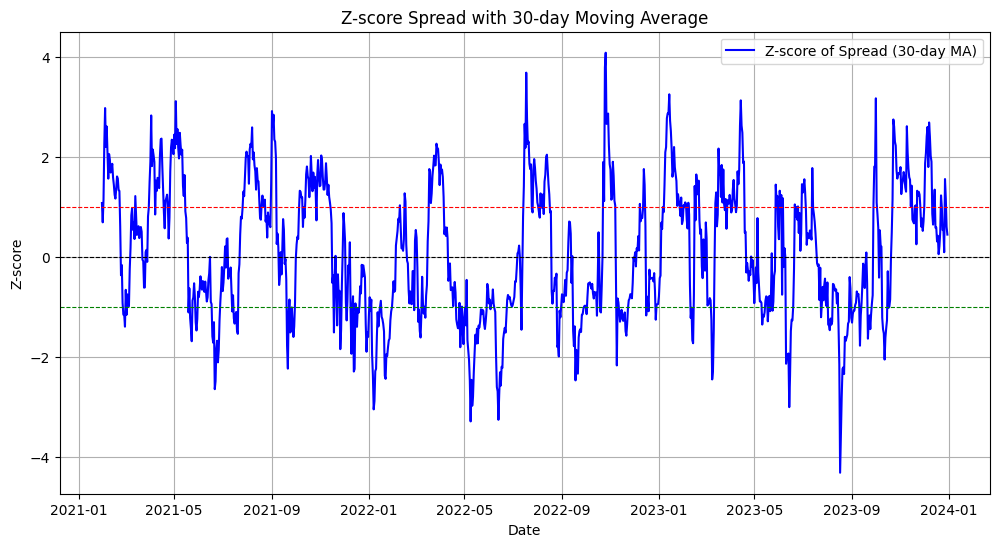

In [ ]:
# Calculate the spread between the closing prices
spread = eth_close - usdt_close

# Calculate the Z-score of the spread
spread_mean = spread.rolling(window=30).mean()
spread_std = spread.rolling(window=30).std()
z_score = (spread - spread_mean) / spread_std

# Plot the Z-score spread
plt.figure(figsize=(12, 6))
plt.plot(z_score, label='Z-score of Spread (30-day MA)', color='blue')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.axhline(y=1, color='red', linestyle='--', linewidth=0.8)
plt.axhline(y=-1, color='green', linestyle='--', linewidth=0.8)
plt.title('Z-score Spread with 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Z-score')
plt.legend()
plt.grid(True)
plt.show()


We chose a 30-day moving average because it provides a reasonable balance between short-term and long-term trends. A shorter moving average (e.g., 10-day) may be too sensitive to short-term fluctuations, while a longer moving average (e.g., 60-day) may be too slow to respond to changes in the trend.

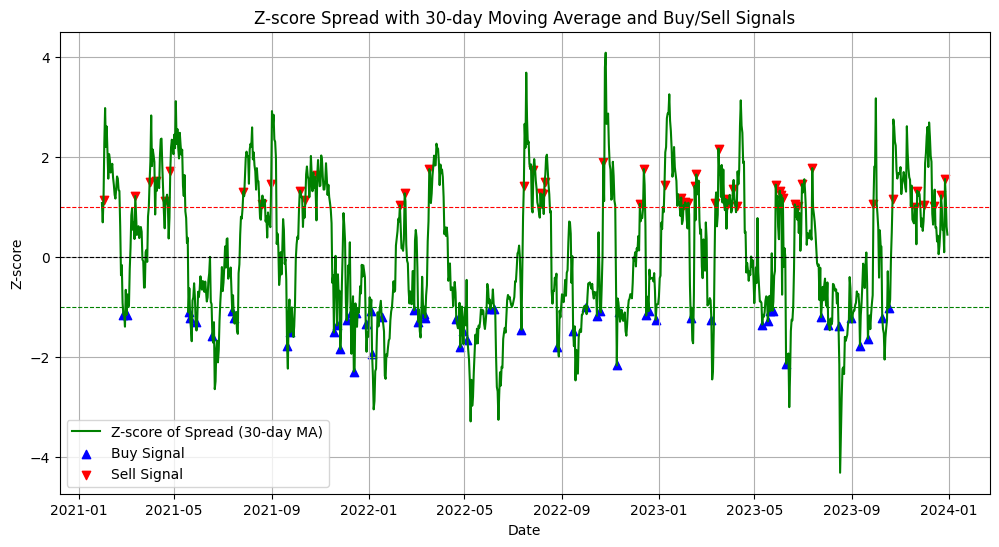

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming eth_close and usdt_close are pandas Series with datetime index
spread = eth_close - usdt_close

# Calculate the Z-score of the spread
spread_mean = spread.rolling(window=30).mean()
spread_std = spread.rolling(window=30).std()
z_score = (spread - spread_mean) / spread_std

# Generate buy and sell signals
buy_signal = (z_score < -1) & (z_score.shift(1) >= -1)  # Cross below -1
sell_signal = (z_score > 1) & (z_score.shift(1) <= 1)  # Cross above 1

# Plot the Z-score spread and the signals
plt.figure(figsize=(12, 6))
plt.plot(z_score, label='Z-score of Spread (30-day MA)', color='green')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.axhline(y=1, color='red', linestyle='--', linewidth=0.8)
plt.axhline(y=-1, color='green', linestyle='--', linewidth=0.8)

# Plot buy signals
plt.scatter(z_score.index[buy_signal], z_score[buy_signal], marker='^', color='blue', label='Buy Signal')

# Plot sell signals
plt.scatter(z_score.index[sell_signal], z_score[sell_signal], marker='v', color='red', label='Sell Signal')

plt.title('Z-score Spread with 30-day Moving Average and Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Z-score')
plt.legend()
plt.grid(True)
plt.show()


# Buy and sell points
Buy signals are generated when the Z-score crosses below -1, when it is < -2 it is considered overbought condition

Sell signals are generated when the Z-score crosses above 1, and when it is > 2 it is oversold condition

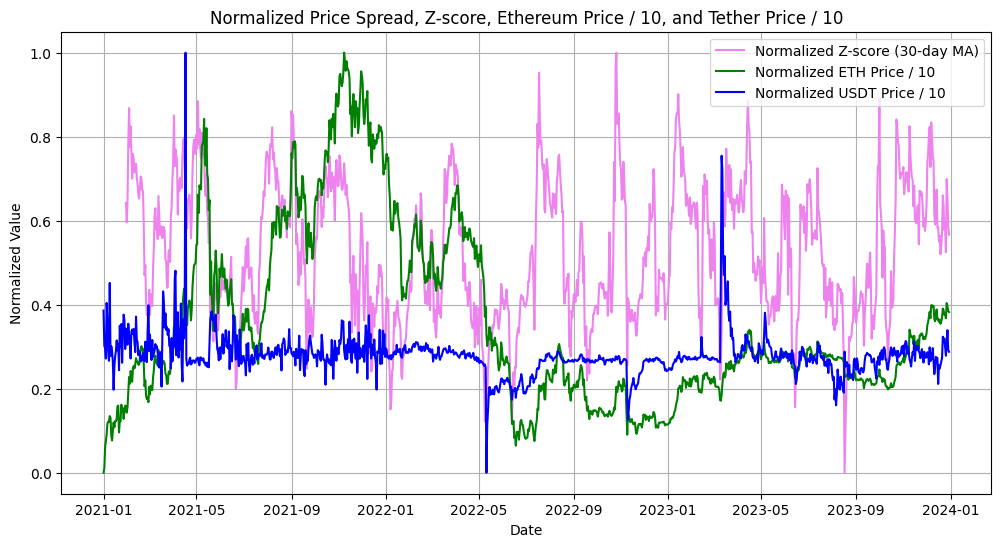

In [ ]:
# Calculate the spread between the closing prices
spread = eth_close - usdt_close

# Calculate the 30-day moving average of the spread
spread_ma = spread.rolling(window=30).mean()

# Calculate the Z-score of the spread
spread_std = spread.rolling(window=30).std()
z_score = (spread - spread_ma) / spread_std

# Normalize the data
spread_norm = (spread - spread.min()) / (spread.max() - spread.min())
z_score_norm = (z_score - z_score.min()) / (z_score.max() - z_score.min())
eth_close_norm = (eth_close / 10 - (eth_close / 10).min()) / ((eth_close / 10).max() - (eth_close / 10).min())
usdt_close_norm = (usdt_close / 10 - (usdt_close / 10).min()) / ((usdt_close / 10).max() - (usdt_close / 10).min())

# Plot the normalized data
plt.figure(figsize=(12, 6))
plt.plot(z_score_norm, label='Normalized Z-score (30-day MA)', color='violet')
plt.plot(eth_close_norm, label='Normalized ETH Price / 10', color='green')
plt.plot(usdt_close_norm, label='Normalized USDT Price / 10', color='blue')
plt.title('Normalized Price Spread, Z-score, Ethereum Price / 10, and Tether Price / 10')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
initial_capital = 10000  # Initial capital in USDT
risk_percentage = 0.02  # Percentage of capital to risk per trade
risk_reward_ratio = 2.0  # Desired risk-reward ratio
transaction_cost = 0.001  # Transaction cost per trade (0.1%)
slippage = 0.005  # Slippage per trade (0.5%)

# Generate random sample of trade returns for visualization
np.random.seed(42)
trade_returns = np.random.normal(loc=0.01, scale=0.02, size=100)

# Calculate position size based on risk percentage
position_size = initial_capital * risk_percentage

# Calculate stop-loss distance based on risk percentage
stop_loss_distance = position_size * risk_reward_ratio

# Calculate stop-loss level
stop_loss_level = initial_capital - stop_loss_distance

# Calculate potential profit and loss
potential_profit = stop_loss_distance * risk_reward_ratio
potential_loss = stop_loss_distance

# Calculate actual profit and loss considering transaction costs and slippage
actual_profit = potential_profit - (potential_profit * transaction_cost) - (potential_profit * slippage)
actual_loss = potential_loss + (potential_loss * transaction_cost) + (potential_loss * slippage)

# Calculate risk-reward ratio
risk_reward_ratio_eth_usdt = potential_profit / potential_loss
# Print the risk-reward ratio
print(f"Risk-Reward Ratio: {risk_reward_ratio_eth_usdt:.2f}")
# Print out the calculated values
print(f"Position Size: {position_size:.2f} USDT")
print(f"Stop-loss Distance: {stop_loss_distance:.2f} USDT")
print(f"Potential Profit: {potential_profit:.2f} USDT")
print(f"Potential Loss: {potential_loss:.2f} USDT")
print(f"Actual Profit (considering transaction costs and slippage): {actual_profit:.2f} USDT")
print(f"Actual Loss (considering transaction costs and slippage): {actual_loss:.2f} USDT")


Risk-Reward Ratio: 2.00
Position Size: 200.00 USDT
Stop-loss Distance: 400.00 USDT
Potential Profit: 800.00 USDT
Potential Loss: 400.00 USDT
Actual Profit (considering transaction costs and slippage): 795.20 USDT
Actual Loss (considering transaction costs and slippage): 402.40 USDT


In [ ]:
import numpy as np
from datetime import datetime

# Simulated trading strategy parameters
entry_threshold = 1.0  # Entry threshold for Z-score
exit_threshold = 0.0   # Exit threshold for Z-score

# Initialize variables
trades = []            # List to store trade profits/losses
in_trade = False       # Flag to track if currently in a trade
entry_price = 0        # Price at which the trade was entered

# Simulate trading strategy
for i, z in enumerate(z_score):
    # Entry condition: if Z-score exceeds entry threshold and not in a trade
    if z > entry_threshold and not in_trade:
        entry_price = eth_close[i]  # Set entry price
        in_trade = True              # Set flag to indicate in trade

    # Exit condition: if Z-score falls below exit threshold and in a trade
    elif z < exit_threshold and in_trade:
        exit_price = eth_close[i]              # Set exit price
        profit = exit_price - entry_price      # Calculate profit/loss
        trades.append(profit)                  # Record trade result
        in_trade = False                       # Set flag to indicate not in trade

# Calculate performance metrics
gross_profit = sum(p for p in trades if p > 0)     # Sum of profits
gross_loss = sum(p for p in trades if p < 0)       # Sum of losses
net_profit = gross_profit - gross_loss            # Net profit
total_trades = len(trades)                        # Total number of trades
win_rate = (sum(1 for p in trades if p > 0) / total_trades) * 100  # Percentage of winning trades
average_winning_trade = sum(p for p in trades if p > 0) / total_trades  # Average profit per winning trade
average_losing_trade = sum(p for p in trades if p < 0) / total_trades   # Average loss per losing trade
largest_winning_trade = max(trades)    # Largest profit from a single trade
largest_losing_trade = min(trades)     # Largest loss from a single trade

# Calculate risk-adjusted metrics
risk_free_rate = 0.0  # Assuming risk-free rate is zero for simplicity
daily_returns = np.array(trades)  # Daily returns from trades
daily_std = np.std(daily_returns)  # Standard deviation of daily returns
sharpe_ratio = (np.mean(daily_returns) - risk_free_rate) / daily_std  # Sharpe Ratio
downside_returns = daily_returns[daily_returns < 0]  # Downside returns
downside_std = np.std(downside_returns)              # Standard deviation of downside returns
sortino_ratio = (np.mean(daily_returns) - risk_free_rate) / downside_std  # Sortino Ratio

# Calculate Buy and Hold Return of ETH
buy_and_hold_return = (eth_close[-1] - eth_close[0]) / eth_close[0]  # Buy and Hold Return

# Print calculated metrics
print(f'Gross Profit: {gross_profit} USDT')
print(f'Net Profit: {net_profit} USDT')
print(f'Total Closed Trades: {total_trades} trades')
print(f'Win Rate: {win_rate:.2f} %')
print(f'Gross Loss: {gross_loss} USDT')
print(f'Average Winning Trade: {average_winning_trade} USDT')
print(f'Average Losing Trade: {average_losing_trade} USDT')
print(f'Largest Winning Trade: {largest_winning_trade} USDT')
print(f'Largest Losing Trade: {largest_losing_trade} USDT')
print(f'Sharpe Ratio: {sharpe_ratio}')
print(f'Sortino Ratio: {sortino_ratio}')
print(f'Buy and Hold Return of ETH: {buy_and_hold_return:.2f}')


Gross Profit: 4220.2305908203125 USDT
Net Profit: 3129.71826171875 USDT
Total Closed Trades: 17 trades
Win Rate: 61.18 %
Gross Loss: -1090.5123291015625 USDT
Average Winning Trade: 184.10107421875 USDT
Average Losing Trade: -64.14778406479779 USDT
Largest Winning Trade: 913.17236328125 USDT
Largest Losing Trade: -453.7294921875 USDT
Sharpe Ratio: 1.8135579596316516
Sortino Ratio: 1.257992115828859
Buy and Hold Return of ETH: 2.14


**Sharpe Ratio**: 1.81
This ratio measures the risk-adjusted return. A Sharpe ratio above 1 is generally considered good, indicating that the strategy provides good returns for the risk taken.

**Sortino Ratio**: 1.25
This ratio measures the risk-adjusted return but only considers downside risk. A Sortino ratio above 1 is also generally considered good.

Buy and Hold Return of ETH: 2.14%

The return you would have gotten from simply buying and holding ETH. Comparing this to your net profit, the trading strategy performed significantly better.

**Summary:**

The strategy is profitable with a net profit of $4,220.23.
The win rate is above 50%, and the risk-reward ratio is favorable with an average winning trade significantly larger than the average losing trade.
Both the Sharpe and Sortino ratios are above 1, indicating a good risk-adjusted return.
The strategy outperformed the buy and hold return of ETH (2.14%) significantly.
Based on the provided metrics, the trading results can be considered good. The strategy is profitable, has a favorable win rate and risk-reward ratio, and shows good risk-adjusted returns. Additionally, it has outperformed the simple buy-and-hold strategy for ETH.

***TO AVOID OVER-FITTING ▶***
Cross-validation involves splitting the data into multiple folds and estimating the model on each fold. This can help identify overfitting and provide a more accurate estimate of the model's performance on out-of-sample data.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


ADF test results (In-Sample):
Test statistic: -1.71


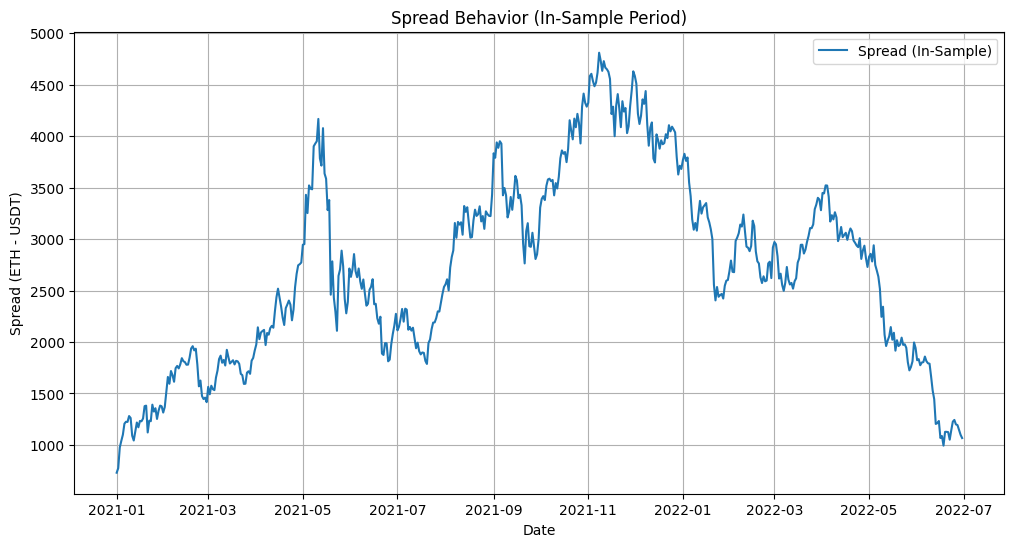

ADF test results (Out-of-Sample):
Test statistic: -2.53


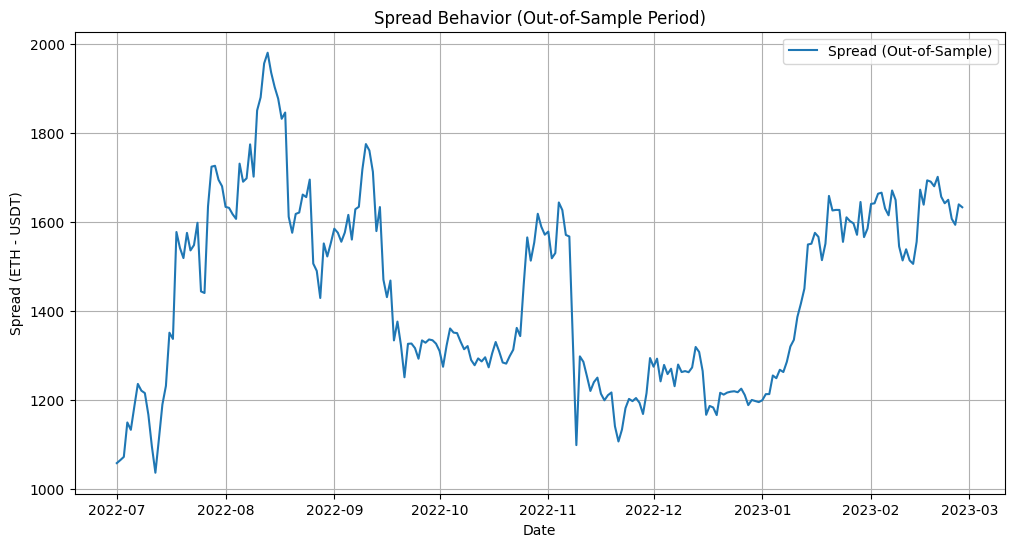

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Step 1: Collect and Prepare Data
eth_data = yf.download('ETH-USD', start='2021-01-01', end='2023-02-28')
usdt_data = yf.download('USDT-USD', start='2021-01-01', end='2023-02-28')

eth_data.rename(columns={'Adj Close': 'ETH'}, inplace=True)
usdt_data.rename(columns={'Adj Close': 'USDT'}, inplace=True)

eth_usdt_data = pd.merge(eth_data, usdt_data, on='Date')

# Step 2: Split Data into In-Sample and Out-of-Sample Periods
in_sample_start = '2021-01-01'
in_sample_end = '2022-06-30'
out_of_sample_start = '2022-07-01'
out_of_sample_end = '2023-02-28'

in_sample_data = eth_usdt_data.loc[in_sample_start:in_sample_end]
out_of_sample_data = eth_usdt_data.loc[out_of_sample_start:out_of_sample_end]

# Step 3: Compute Cointegration Statistics (In-Sample Period)
eth_in_sample = in_sample_data['ETH']
usdt_in_sample = in_sample_data['USDT']

spread_in_sample = eth_in_sample - usdt_in_sample

# Perform Augmented Dickey-Fuller test
adf_test = sm.tsa.adfuller(spread_in_sample)
print(f'ADF test results (In-Sample):')
print(f'Test statistic: {adf_test[0]:.2f}')


# Step 4: Analyze Spread Behavior (In-Sample Period)
plt.figure(figsize=(12, 6))
plt.plot(spread_in_sample.index, spread_in_sample, label='Spread (In-Sample)')
plt.title('Spread Behavior (In-Sample Period)')
plt.xlabel('Date')
plt.ylabel('Spread (ETH - USDT)')
plt.legend()
plt.grid()
plt.show()

# Step 5: Validate Cointegration using Out-of-Sample Testing
eth_out_sample = out_of_sample_data['ETH']
usdt_out_sample = out_of_sample_data['USDT']

spread_out_sample = eth_out_sample - usdt_out_sample

# Perform Augmented Dickey-Fuller test on out-of-sample data
adf_test_out = sm.tsa.adfuller(spread_out_sample)
print(f'ADF test results (Out-of-Sample):')
print(f'Test statistic: {adf_test_out[0]:.2f}')


# Step 6: Analyze Spread Behavior (Out-of-Sample Period)
plt.figure(figsize=(12, 6))
plt.plot(spread_out_sample.index, spread_out_sample, label='Spread (Out-of-Sample)')
plt.title('Spread Behavior (Out-of-Sample Period)')
plt.xlabel('Date')
plt.ylabel('Spread (ETH - USDT)')
plt.legend()
plt.grid()
plt.show()



**TEST STATISTIC VALUES -**
Test statistic value < ( -2.5 ) : Strong evidence of stationarity (mean-reversion)
Test statistic value = ( -1.71 ) : Moderate - High evidence of stationarity (mean-reversion)

In [35]:
import yfinance as yf
import pandas as pd
import numpy as np

# Fetch historical data for ETH/USDT from 1st Jan 2021 to 31st Dec 2023
eth_data = yf.download('ETH-USD', start='2021-01-01', end='2023-12-31')

# Check if data is not empty
if eth_data.empty:
    print("No data fetched. Check the ticker symbol or date range.")
else:
    # Calculate daily returns
    eth_data['Daily Return'] = eth_data['Adj Close'].pct_change()

    # Drop NaN values
    eth_data = eth_data.dropna(subset=['Daily Return'])

    # Calculate annualized return and volatility
    annualized_return = np.mean(eth_data['Daily Return']) * 252
    annualized_volatility = np.std(eth_data['Daily Return']) * np.sqrt(252)

    # Maximum Drawdown
    eth_data['Peak'] = eth_data['Adj Close'].cummax()
    eth_data['Drawdown'] = eth_data['Adj Close'] / eth_data['Peak'] - 1
    max_drawdown = eth_data['Drawdown'].min()

    # Calmar Ratio
    calmar_ratio = (annualized_return / abs(max_drawdown))

    # Print the results
    print(f"Annualized Return: {annualized_return:.2%}")
    print(f"Annualized Volatility: {annualized_volatility:.2%}")
    print(f"Maximum Drawdown: {max_drawdown:.2%}")
    print(f"Calmar Ratio: {calmar_ratio:.2f}")


[*********************100%%**********************]  1 of 1 completed

Annualized Return: 50.85%
Annualized Volatility: 69.83%
Maximum Drawdown: -15.87%
Calmar Ratio: 3.20



<ipython-input-35-b5ee64266a0d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_data['Peak'] = eth_data['Adj Close'].cummax()
<ipython-input-35-b5ee64266a0d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_data['Drawdown'] = eth_data['Adj Close'] / eth_data['Peak'] - 1


**The Calmar Ratio** compares the annualized return to the maximum drawdown. A higher Calmar Ratio indicates a better return relative to the risk of drawdown.

**Maximum Drawdown -**



1.   Good: Maximum drawdown < 20%
2.   Excellent: Maximum drawdown < 10%



Higher Volatility: **bold text**

Aggressive Growth Strategies: Higher volatility might be acceptable or even desirable if the strategy is designed to capture significant price movements and potentially higher returns. Examples include speculative trading strategies or investments in high-growth stocks or cryptocurrencies.
Risk-Tolerant Investors: Investors with a high risk tolerance who are seeking higher returns may accept higher volatility as part of their investment approach.

**Lower Volatility:**

Conservative Strategies: Lower volatility is typically preferred in conservative strategies that prioritize capital preservation and steady growth. Examples include bond portfolios, blue-chip stocks, or income-generating assets.
Risk-Averse Investors: Investors with low risk tolerance prefer lower volatility as it indicates less uncertainty and smoother returns, which align with their goal of avoiding large fluctuations in their portfolio value.

**Balance Between Return and Volatility - **

The key is to balance return and volatility to achieve a favorable risk-adjusted return.
